In [2]:
import pandas as pd
import math

# Create a DataFrame with the provided data

data = [
    ["<=30","high", "no", "fair", "no"],
    ["<=30","high", "no", "excellent",  "no"],
    [ "31…40","high", "no", "fair", "yes"],
    [ ">40","medium", "no", "fair", "yes"],
    [">40","low", "yes", "fair",  "yes"],
    [ ">40","low", "yes", "excellent", "no"],
    [ "30...40", "low", "yes", "excellent","yes"],
    [ "<=30", "medium", "no", "fair","no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31...40", "medium", "no","excellent", "yes"],
    ["31...40", "high", "yes","fair", "yes"],
    [">40", "medium", "no", "excellent", "no"],
]

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=["age", "income", "student", "credit_rating", "buys_computer"])


# Calculate the entropy of the class label 'buys_computer'
def calculate_entropy(data):
    total_samples = len(data)
    if total_samples == 0:
        return 0
    positive_samples = sum(data['buys_computer'] == 'yes')
    negative_samples = sum(data['buys_computer'] == 'no')
    p_positive = positive_samples / total_samples
    p_negative = negative_samples / total_samples
    if p_positive == 0 or p_negative == 0:
        return 0
    entropy = -p_positive * math.log2(p_positive) - p_negative * math.log2(p_negative)
    return entropy

entropy_root = calculate_entropy(df)

# Calculate Information Gain for each attribute
def calculate_information_gain(data, attribute, root_entropy):
    unique_values = data[attribute].unique()
    weighted_entropy_after_split = 0
    for value in unique_values:
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset)
        weight = len(subset) / len(data)
        weighted_entropy_after_split += weight * subset_entropy
    information_gain = root_entropy - weighted_entropy_after_split
    return information_gain

# Calculate Information Gain for each attribute
root_entropy = calculate_entropy(df)
information_gains = {}
for attribute in df.columns[:-1]:  # Exclude the 'buys_computer' column
    information_gain = calculate_information_gain(df, attribute, root_entropy)
    information_gains[attribute] = information_gain

# Identify the attribute with the highest Information Gain as the root node
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for attribute, gain in information_gains.items():
    print(f"{attribute}: {gain}")

print(f"\nRoot Node (Highest Information Gain): {root_node}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949

Root Node (Highest Information Gain): age


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load your dataset (replace 'data.csv' with your data file)


# Separate features (X) and target variable (y)
X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

# Handle categorical variables (one-hot encoding)
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Impute missing values (if any)
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Combine the encoded and imputed data with non-categorical columns
X_final = pd.concat([pd.DataFrame(X_imputed), X.drop(columns=categorical_cols)], axis=1)

# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_final, y)

# Get the depth of the constructed tree
tree_depth = model.get_depth()

print(f"Decision Tree Depth: {tree_depth}")


Decision Tree Depth: 4


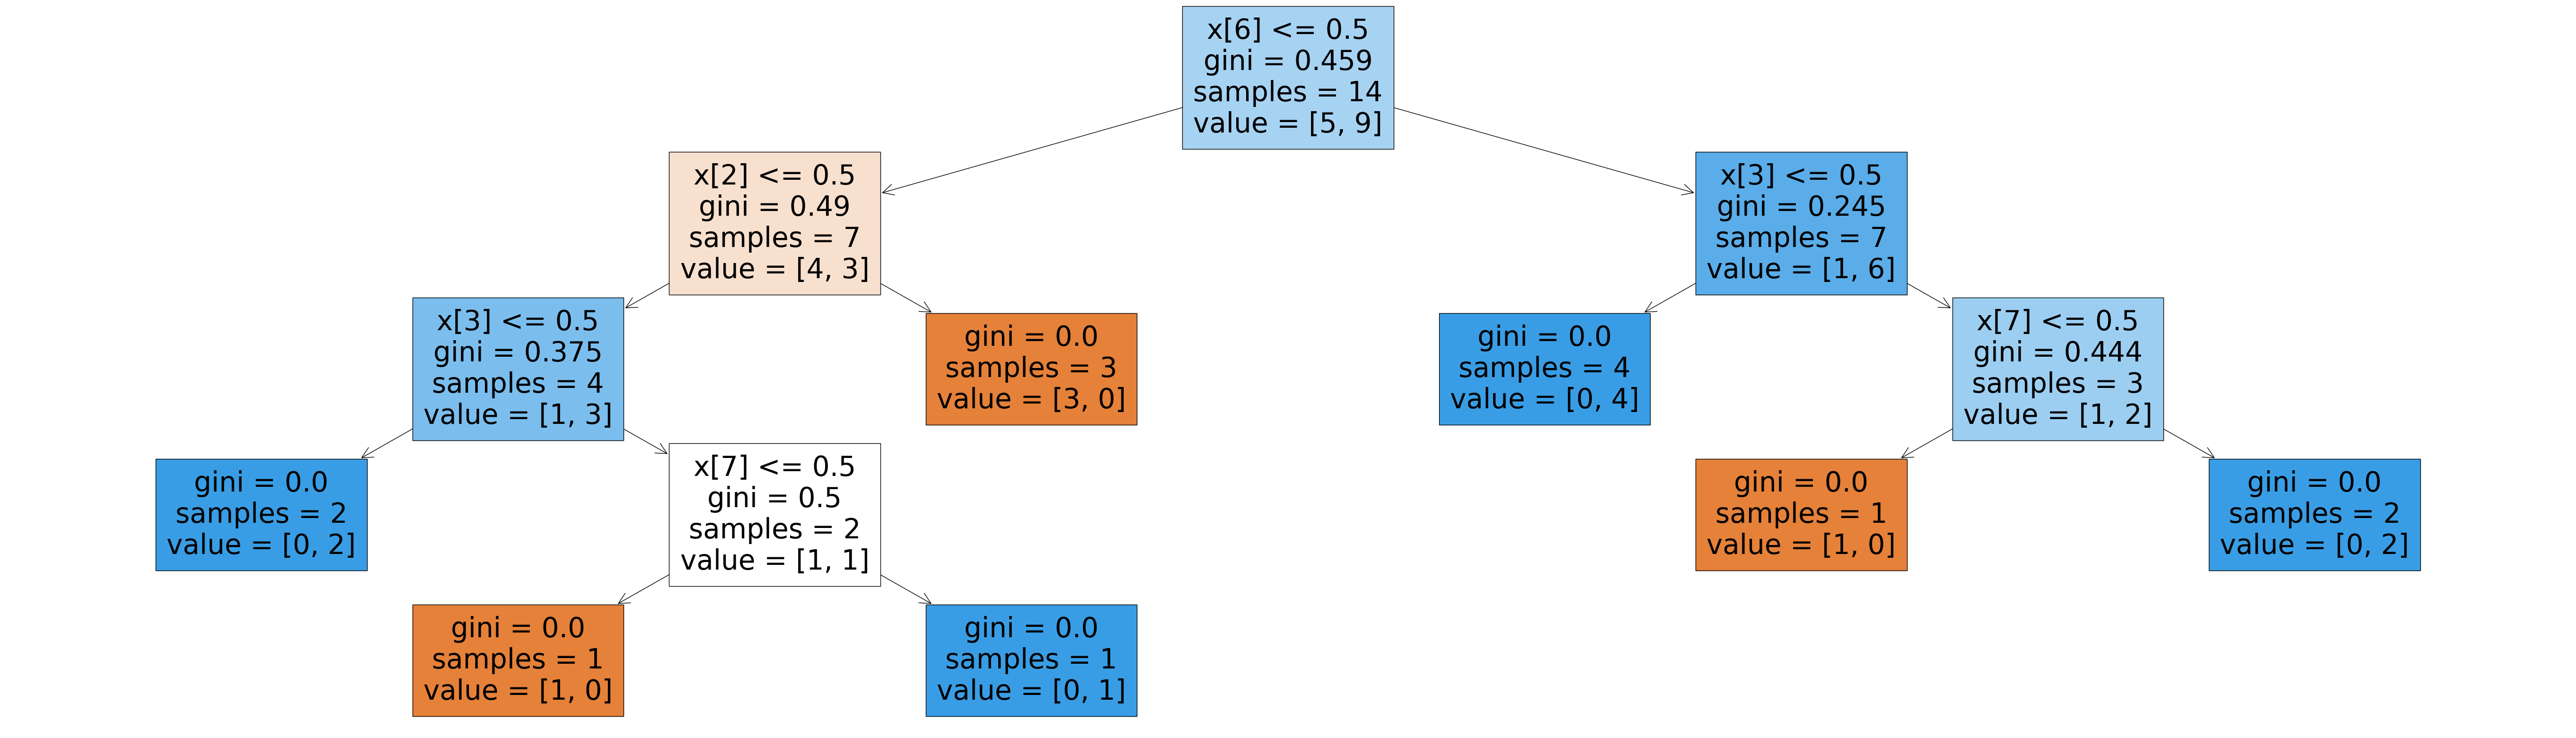

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have already created and fitted your Decision Tree model (model)

# Set the figure size for a larger visualization
plt.figure(figsize=(70, 20))

# Use plot_tree to visualize the Decision Tree
plot_tree(model, filled=True)

# Show the plot
plt.show()


Training Set Accuracy: 0.8946478873239436
Test Set Accuracy: 0.6343843843843844


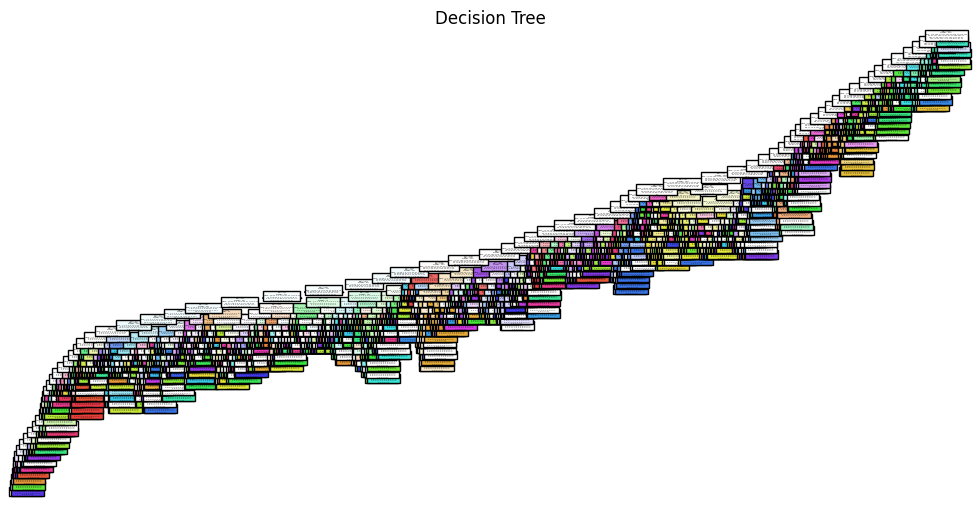

In [9]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have loaded your data into variables Tr_X, Tr_y, Te_X, Te_y
df=pd.read_csv("extracted_features_charrec.csv")
X = df.drop(columns=['class_name'])
y = df['class_name']

# Step 2: Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Step 4: Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()


Training Set Accuracy: 0.20413145539906102
Test Set Accuracy: 0.2072072072072072


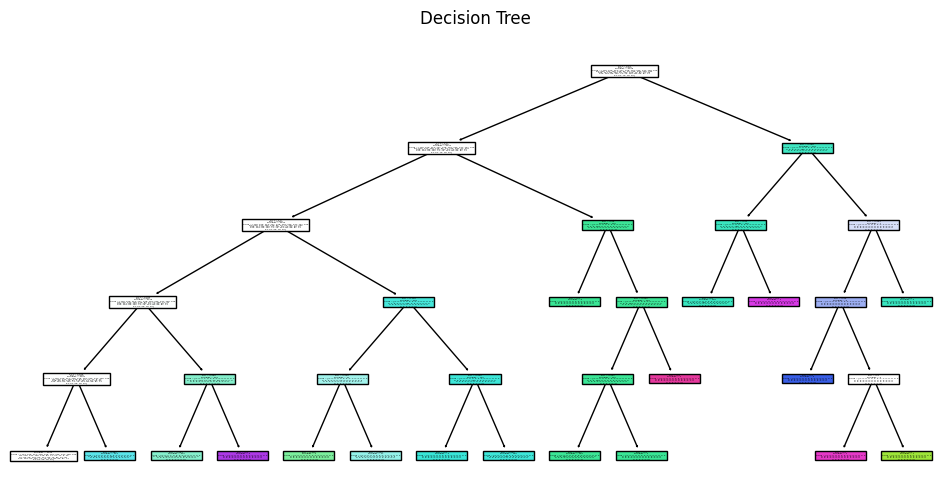

In [10]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have loaded your data into variables Tr_X, Tr_y, Te_X, Te_y
df=pd.read_csv("extracted_features_charrec.csv")
X = df.drop(columns=['class_name'])
y = df['class_name']

# Step 2: Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the Decision Tree classifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)

# Step 4: Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()


Training Set Accuracy: 0.8946478873239436
Test Set Accuracy: 0.6298798798798799


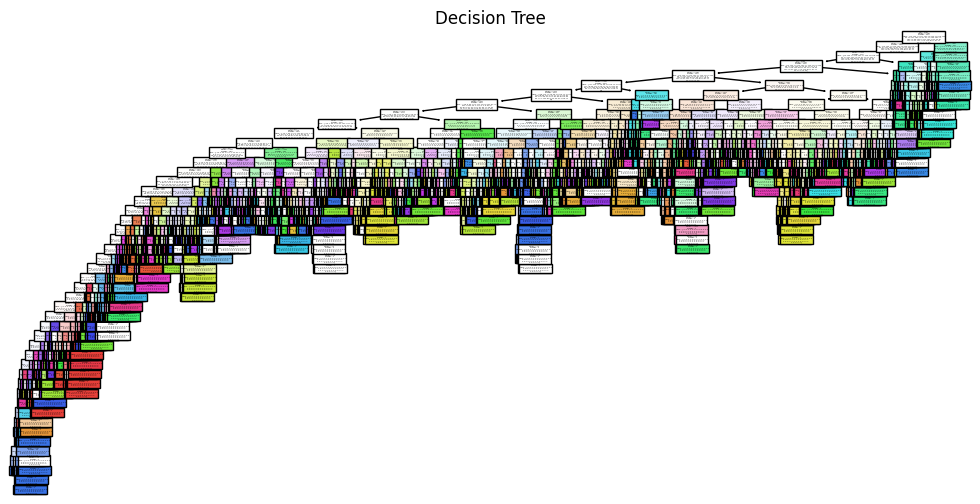

In [11]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have loaded your data into variables Tr_X, Tr_y, Te_X, Te_y
df=pd.read_csv("extracted_features_charrec.csv")
X = df.drop(columns=['class_name'])
y = df['class_name']

# Step 2: Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the Decision Tree classifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(Tr_X, Tr_y)

# Step 4: Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()


Random Forest Training Set Accuracy: 0.8931455399061032
Random Forest Test Set Accuracy: 0.6629129129129129


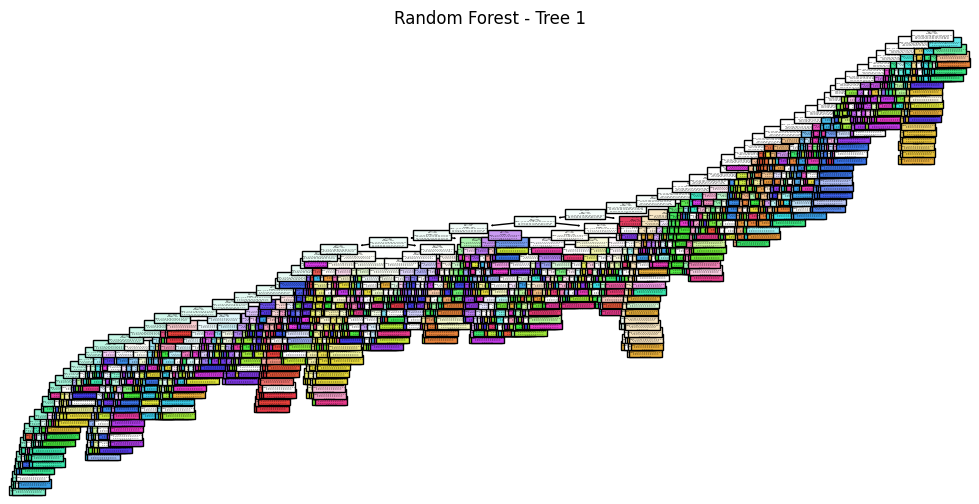

In [14]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

# Assuming you have loaded your data into variables Tr_X, Tr_y, Te_X, Te_y
df = pd.read_csv("extracted_features_charrec.csv")
X = df.drop(columns=['class_name'])
y = df['class_name']

# Step 2: Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the Random Forest classifier (changed from Decision Tree)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(Tr_X, Tr_y)

# Step 4: Evaluate the accuracy of the Random Forest model (changed from Decision Tree)
rf_training_accuracy = rf_model.score(Tr_X, Tr_y)
rf_test_accuracy = rf_model.score(Te_X, Te_y)

print(f"Random Forest Training Set Accuracy: {rf_training_accuracy}")
print(f"Random Forest Test Set Accuracy: {rf_test_accuracy}")

# Step 5: Visualize one of the trees in the Random Forest (similar to Decision Tree)
# You can choose one of the trees in the forest for visualization
# For example, to visualize the first tree in the forest:
plt.figure(figsize=(12, 6))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=list(X.columns))
plt.title("Random Forest - Tree 1")
plt.show()
